# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [86]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [87]:
 #uncomment and run the following lines for Google Colab
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
# read the data
path="/content/drive/MyDrive/Austin Texas/Foundations/project/"
df = pd.read_csv(path+'foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [89]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
- The data has **1898** rowns and **9** columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [90]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- The dataset has 9 columns.
- Data types:
  * **Object** : 4 columns (restaurant_name,cuisine_type,day_of_the_week,rating).
  * **Integer**: 4 columns (order_id,customer_id,food_preparation_time,delivery_time).
  * **Float** (decimal): 1 column (cost_of_the_order).  

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [91]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
- The dataset do not have missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [92]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


Sumary of the string features

In [93]:
df.describe(include="object").T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:
**Food Preparation time:**
- Minimum: **20** minutes.
- Maximum: **35** minutes.
- Average: **27.4** minutes.
- Mediam: **27** minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [54]:
# Write the code here
df.groupby("rating")["order_id"].count()

rating
3            188
4            386
5            588
Not given    736
Name: order_id, dtype: int64

In [55]:
df.value_counts("rating",normalize=True)

rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
dtype: float64

#### Observations:
- There are **736** orders **(38,7%)** without rating

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Creating functions to plot the analysis

In [56]:
def plot_numerical_univariate(data,feature,description):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 6))
  sns.set_style("darkgrid")

  # Add a graph in each part
  sns.boxplot(data=data, x=feature, ax=ax_box)
  sns.histplot(data=data, x=feature, kde=True, ax=ax_hist,bins=5,stat="count") #stat could be percent
  ax_box.set(xlabel=description)
  plt.show()

In [57]:
def plot_categorical_univariate(df_data,feature,description,tick=True):
  #ordering the values
  df_ordered=df.groupby(by=[feature])["order_id"].count().reset_index().sort_values(by="order_id",ascending=False)
  bar_order=df_ordered[feature]

  #Plotting the graph
  plt.figure(figsize = (12, 5)) # Increase output size.
  p=sns.barplot(data=df_ordered,x=feature,y="order_id",order=bar_order)

  #adding the labels
  for i,value in enumerate(df_ordered["order_id"]):
        plt.text(i, value,value, ha = 'center', va = 'bottom') #{'bottom', 'baseline', 'center', 'center_baseline', 'top'}

  #adding tick
  if(tick):
        plt.xticks(rotation = 45, fontsize = 12)

  plt.xlabel(feature)
  plt.ylabel('Count of')
  plt.title(description)


  #showing the graph
  plt.show()



###**Categorical Features**

####1. Order_ID

In [58]:
df["order_id"].nunique()

1898

Observations:
- The dataset has **1898** unique order_id. The same number of rows.

####2. Restaurant Names

In [59]:
df["restaurant_name"].nunique()

178

Observations:
- The dataset has **178** unique restaurants

####3. Day of the week:

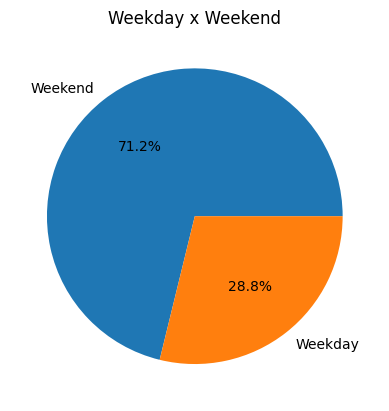

In [60]:

labels=df["day_of_the_week"].unique()
ax=plt.pie(df["day_of_the_week"].value_counts(),autopct="%.1f%%",labels=labels)
plt.title("Weekday x Weekend")
plt.show()

Observations:
- Most orders were on the weekend **(71.2%)**.

####4. Cuisine Type:

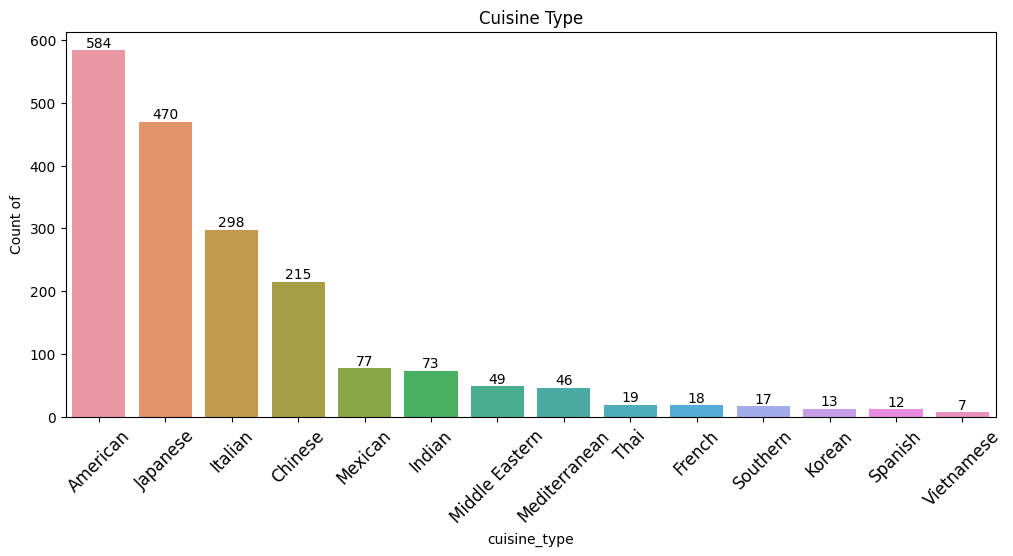

In [61]:
plot_categorical_univariate(df,"cuisine_type","Cuisine Type")

Observations:
- There are **14** different types of cuisine.
- **American** is the most popular (584 rows) .
- **Vietnamese** is the least popular (7 rows).

####4. Rating:

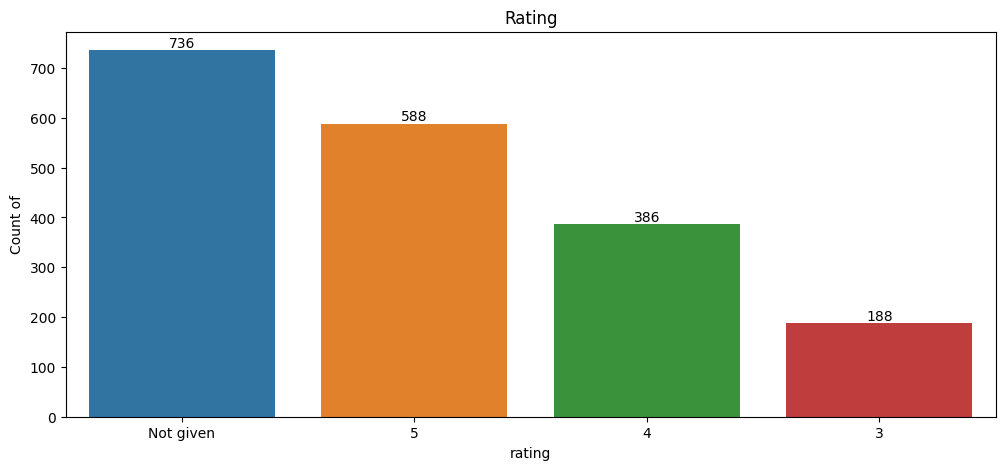

In [62]:
plot_categorical_univariate(df,"rating","Rating",False)

Observations:
- there are more unrated orders(736) than in each individual rating (5,4 or 3).
- Between the rated orders, There are more orders with a maximum rating (5) than with other ratings (3 and 4).

**Numerical Features**

Creating the total time variable

In [63]:
df["total_time"]=df["food_preparation_time"] + df["delivery_time"]

**1. Food Preparation Time:**

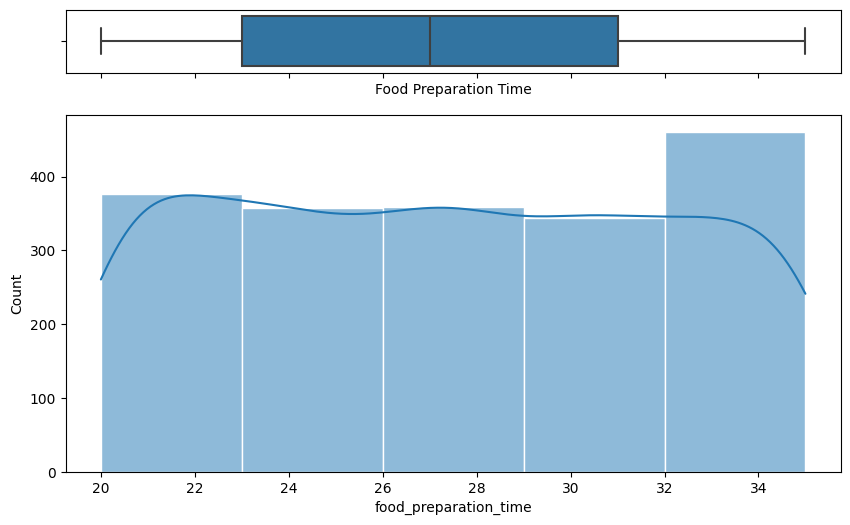

In [64]:
plot_numerical_univariate(df,"food_preparation_time","Food Preparation Time")

**Observations:**
- Food Preparation time has a uniform distribution.
- Range between 20 minutes and 34 minutes.
- There are no outliers.

**2. Delivery Time:**

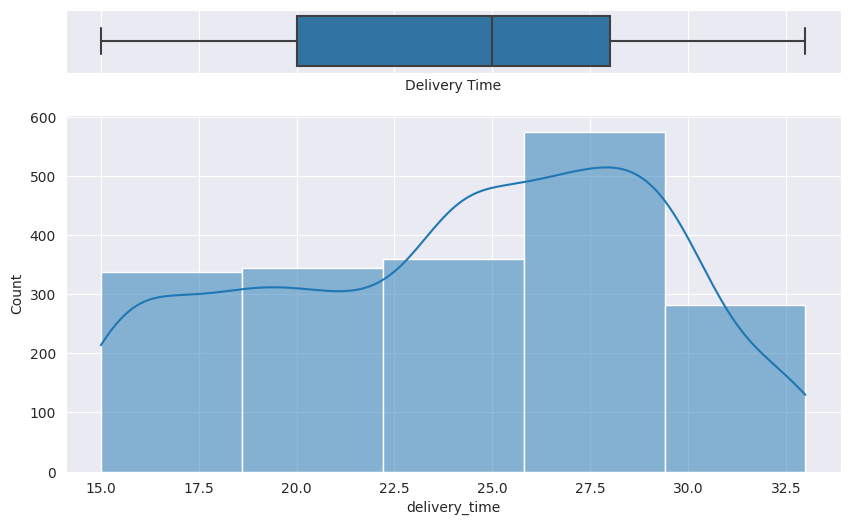

In [65]:
plot_numerical_univariate(df,"delivery_time","Delivery Time")

Observations:
- The delivery time is left skewed.
- Range between 15 and 33.
- There are no outliers.
- The values are concentrated between 23 and 30 minutes approximately.

**3. cost_of_the_order:**

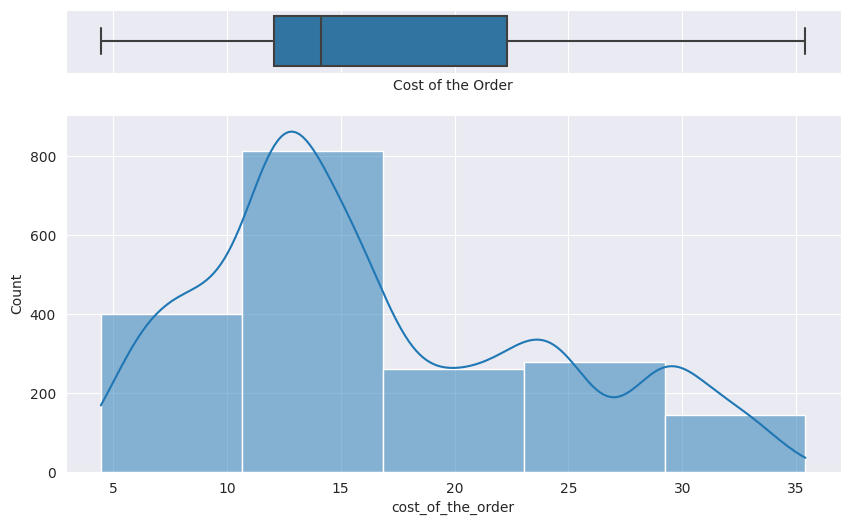

In [66]:
plot_numerical_univariate(df,"cost_of_the_order","Cost of the Order")

Observations:
- The cost of the order is right skewed.
- Range between 5 and 35.
- There are no outliers.
- The values are concentrated between 10 and 15 approximately.

**4. Total Time:**

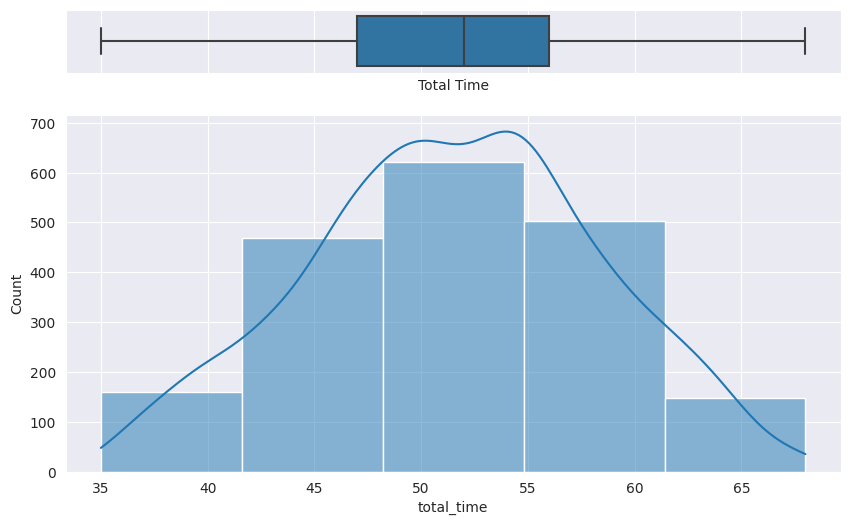

In [67]:
plot_numerical_univariate(df,"total_time","Total Time")

In [68]:
print("Mean:",df["total_time"].mean())
print("Median:",df["total_time"].median())
print("Standard Deviation:",df["total_time"].std())
min_range=df["total_time"].mean()-df["total_time"].std()
max_range=df["total_time"].mean()+df["total_time"].std()
print(f"Range:{min_range} and {max_range}")

Mean: 51.53371970495258
Median: 52.0
Standard Deviation: 6.833602591220876
Range:44.70011711373171 and 58.367322296173455


Observations:
- The total time has a normal distribution.
- Mean:51.5 minutes and standard deviation of 6.8 minutes.
- There are no outliers.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [69]:
# Write the code here
df.value_counts("restaurant_name", ascending=False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
dtype: int64

#### Observations:
he top 5 restaurants in terms of the number of orders received are:
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [70]:
# Write the code here
#cuisine_type day_of_the_week
df[df["day_of_the_week"]=="Weekend"].value_counts("cuisine_type").head(1)

cuisine_type
American    415
dtype: int64

#### Observations:
- The most popular cuisine is the **American** with 415 orders on Weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [71]:
# Write the code here
df["cost_more_than_20"] = df['cost_of_the_order'].apply(lambda x:x>20)
df.value_counts("cost_more_than_20",normalize=True)

cost_more_than_20
False    0.707587
True     0.292413
dtype: float64

#### Observations:
- the percentage of the orders that cost more than 20 dollars is **29.2%**

### **Question 10**: What is the mean order delivery time? [1 mark]

In [72]:
# Write the code here
df["delivery_time"].mean()

24.161749209694417

#### Observations:
- The mean order delivery time is **24.2** minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [73]:
# Write the code here
df.value_counts("customer_id", ascending=False).head(3)

customer_id
52832    13
47440    10
83287     9
dtype: int64

#### Observations:
The top 3 customers are:
1. ID:52832 / #Orders: 13
2. ID: 47440 / #Orders:10
3. ID:83287 / #Orders:9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Creating functions to do the Multivariate Analysis

In [74]:
def box_plot_multivariate_analysis (df_data,x,y,description,tick=True):
  #Sorting by Median
  df_ordered=df_data.groupby(by=[x])[y].median().reset_index().sort_values(by=y,ascending=False)
  bar_order=df_ordered[x]

  # Relationship between cost of the order and cuisine type
  plt.figure(figsize=(15,7))
  sns.boxplot(x =x, y = y, data = df_data, palette = 'PuBu',order=bar_order)
  if tick:
     plt.xticks(rotation = 60)
  plt.title(description)
  plt.show()

In [75]:
def point_multivariate_analysis(df_data,x,y,description,tick=True):
  plt.figure(figsize=(15, 7))
  sns.pointplot(x =x, y = y, data = df_data)
  if tick:
      plt.xticks(rotation = 60)
  plt.title(description)
  plt.show()

#### Cuisine vs Cost of the order

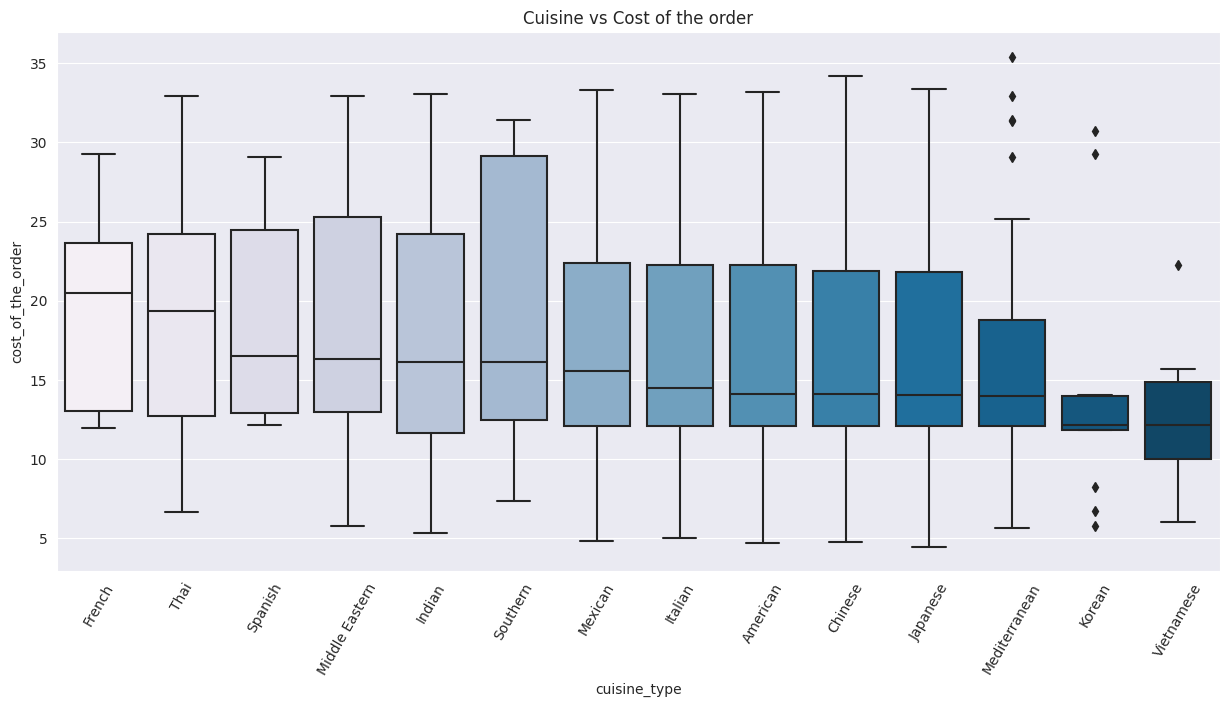

In [76]:
box_plot_multivariate_analysis(df,"cuisine_type","cost_of_the_order","Cuisine vs Cost of the order")

#### Observations:
- French cuisine has the highest median.
- Southem has the biggest IQR.

#### Cuisine vs Food Preparation Time

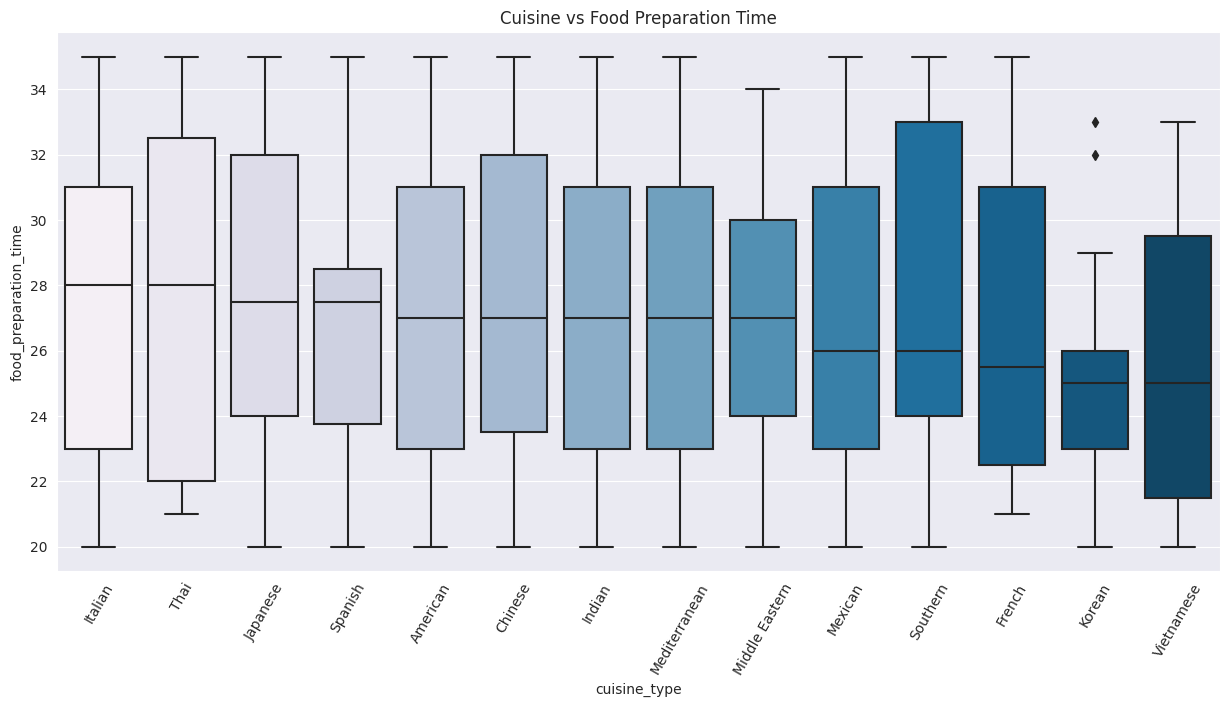

In [77]:
box_plot_multivariate_analysis(df,"cuisine_type","food_preparation_time","Cuisine vs Food Preparation Time")

#### Observations:
- Italian and Thai cuisines have highest median.
- Korean has the smallest IQR.

#### Cuisine vs Delivery Time

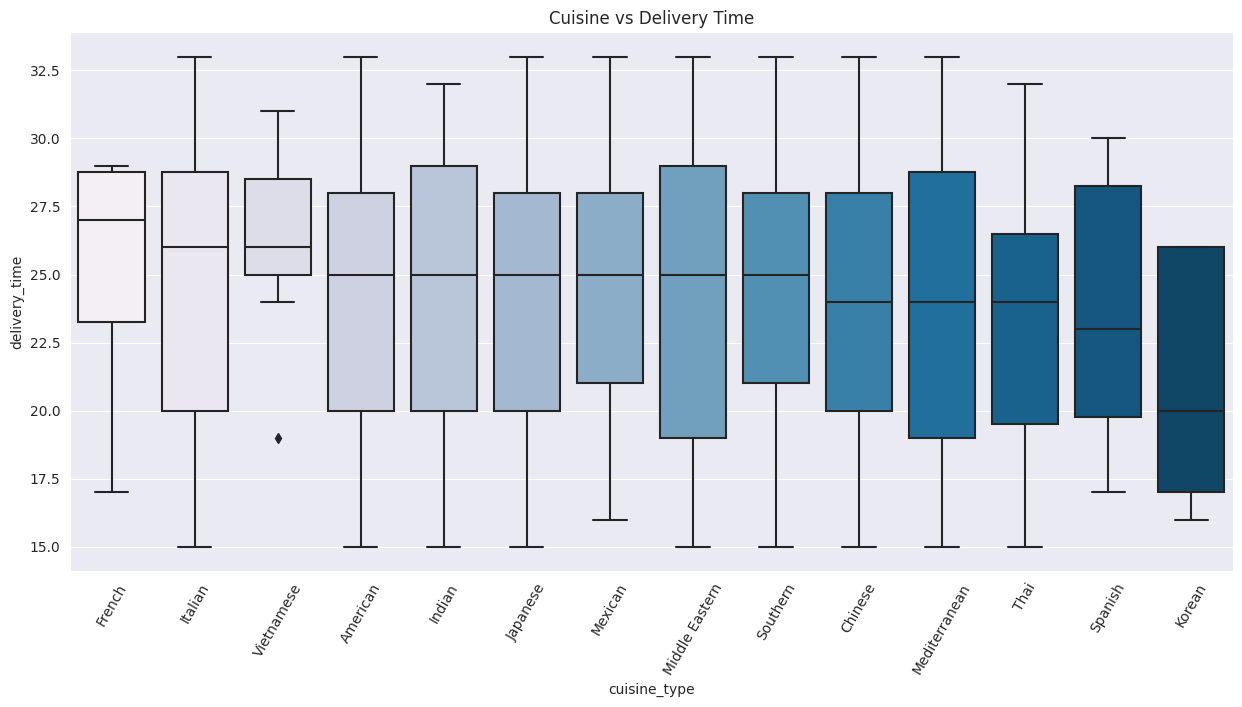

In [78]:
box_plot_multivariate_analysis(df,"cuisine_type","delivery_time","Cuisine vs Delivery Time")

#### Observations:
- French cuisine has the highest median.
- Korean has the smallest median.
- Vietnamese has an outlier.

Cuisine vs Total Time

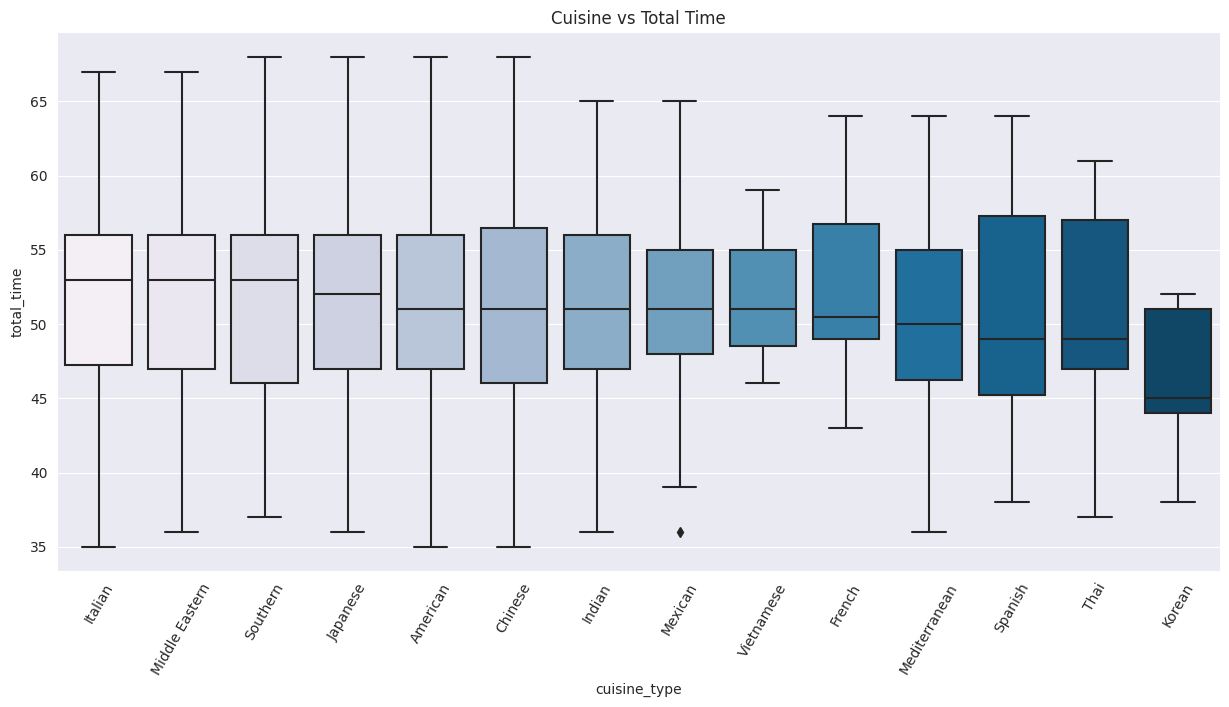

In [79]:
box_plot_multivariate_analysis(df,"cuisine_type","total_time","Cuisine vs Total Time")

#### Observations:
- Italian,Middle Eastern and Southem cuisines have the highest median.
- Korean has the smallest median.

#### Cuisine type vs Rating

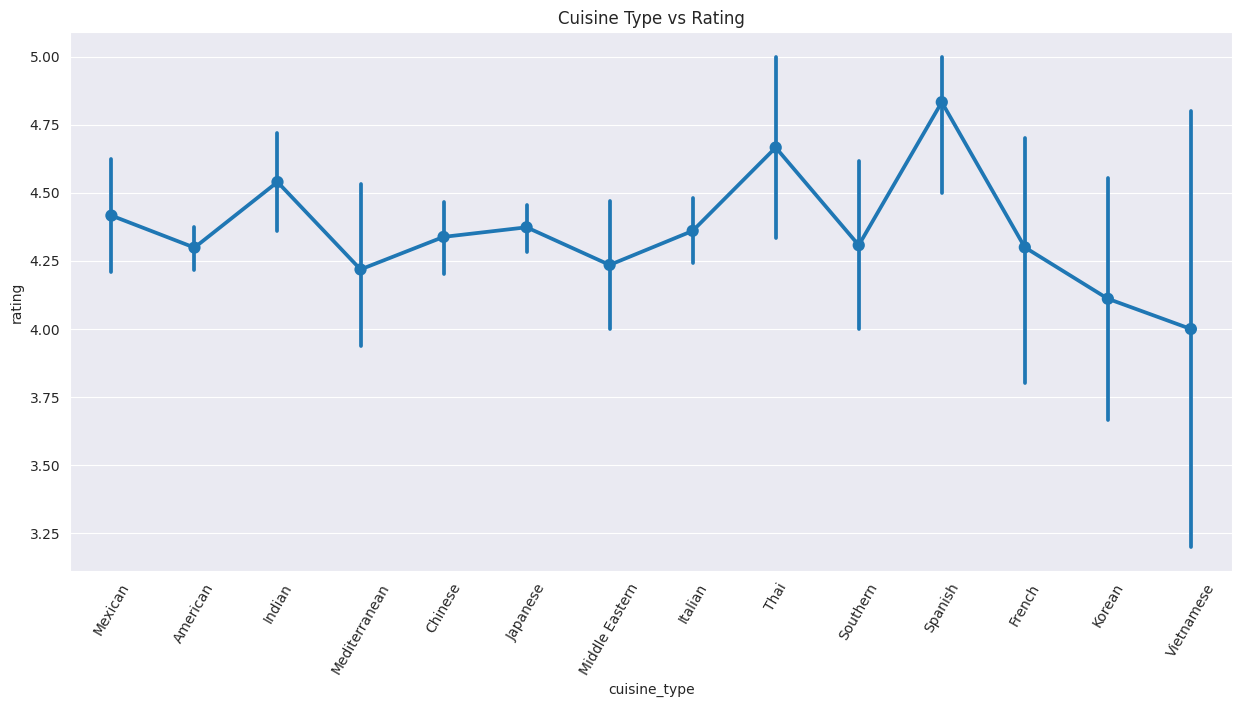

In [80]:
df_rating_only=df[df['rating'] != 'Not given']
df_rating_only["rating"] = df_rating_only['rating'].astype(int)
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'cuisine_type', y = 'rating', data = df_rating_only)
plt.xticks(rotation = 60)
plt.title("Cuisine Type vs Rating")
plt.show()

Observations:
- Spanish cuisine has the highest ratings (in average) despite not being the most popular

#### Rating vs Delivery Time

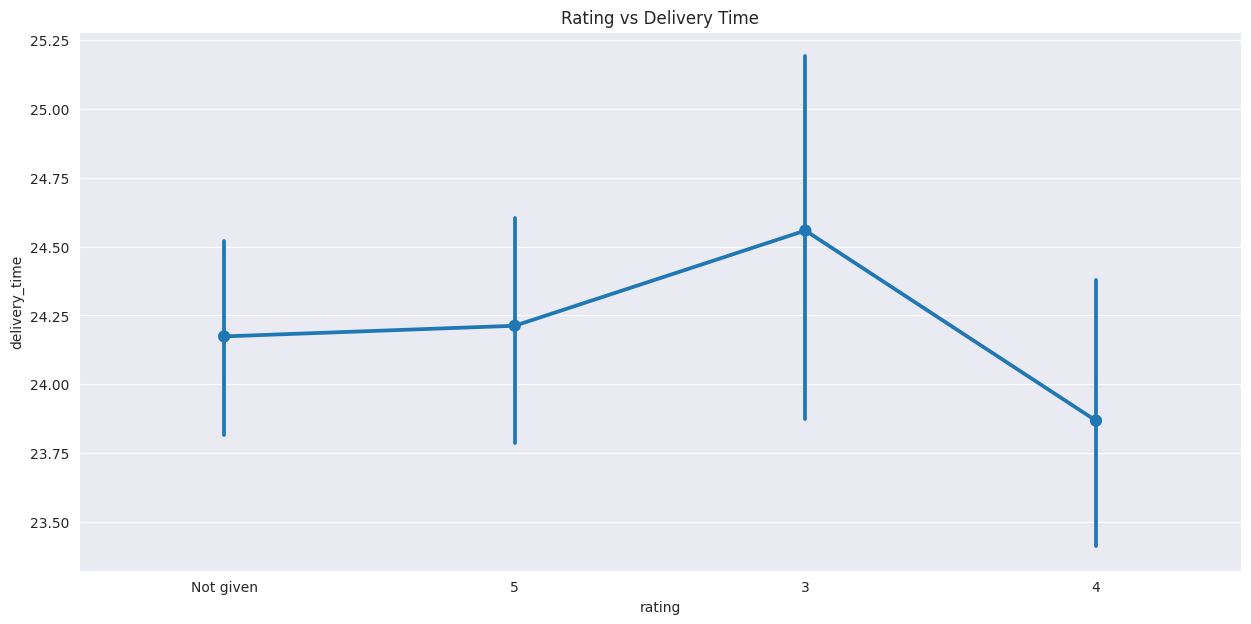

In [81]:
point_multivariate_analysis(df,"rating","delivery_time","Rating vs Delivery Time",False)
#box_plot_multivariate_analysis(df,"rating","delivery_time","Rating vs Delivery Time",False)

#### Observations:
- The lowest rating (3) has the higher delivery time in average.

#### Rating vs Food Preparation Time

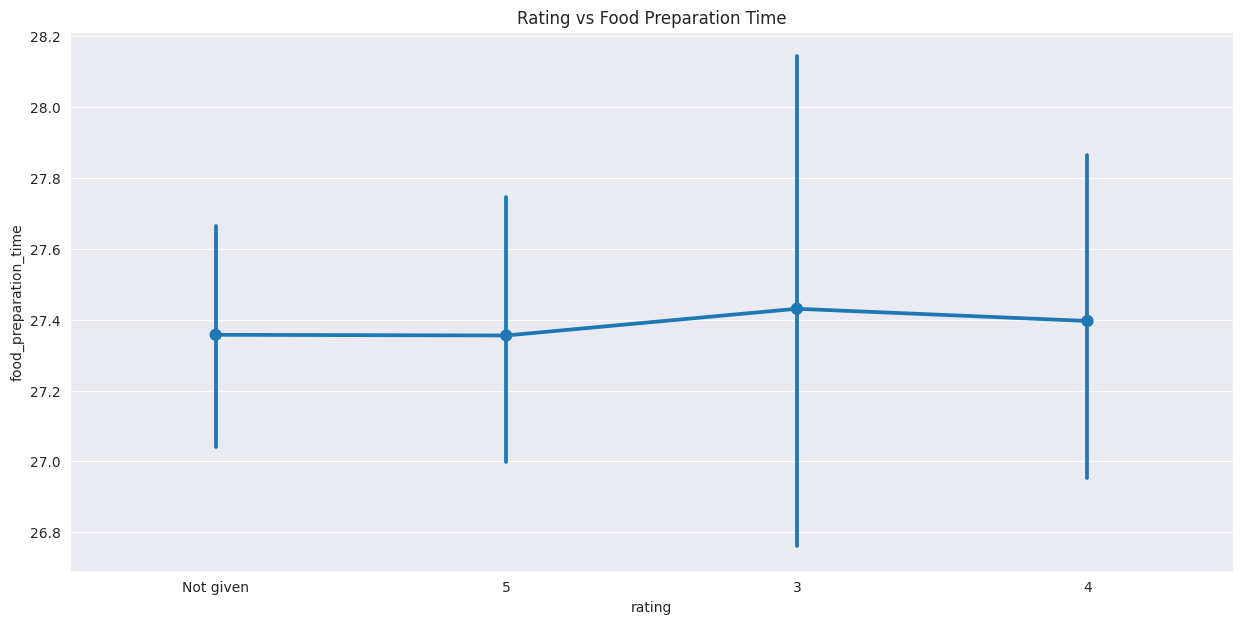

In [82]:
point_multivariate_analysis(df,"rating","food_preparation_time","Rating vs Food Preparation Time",False)

#### Rating vs Total Time

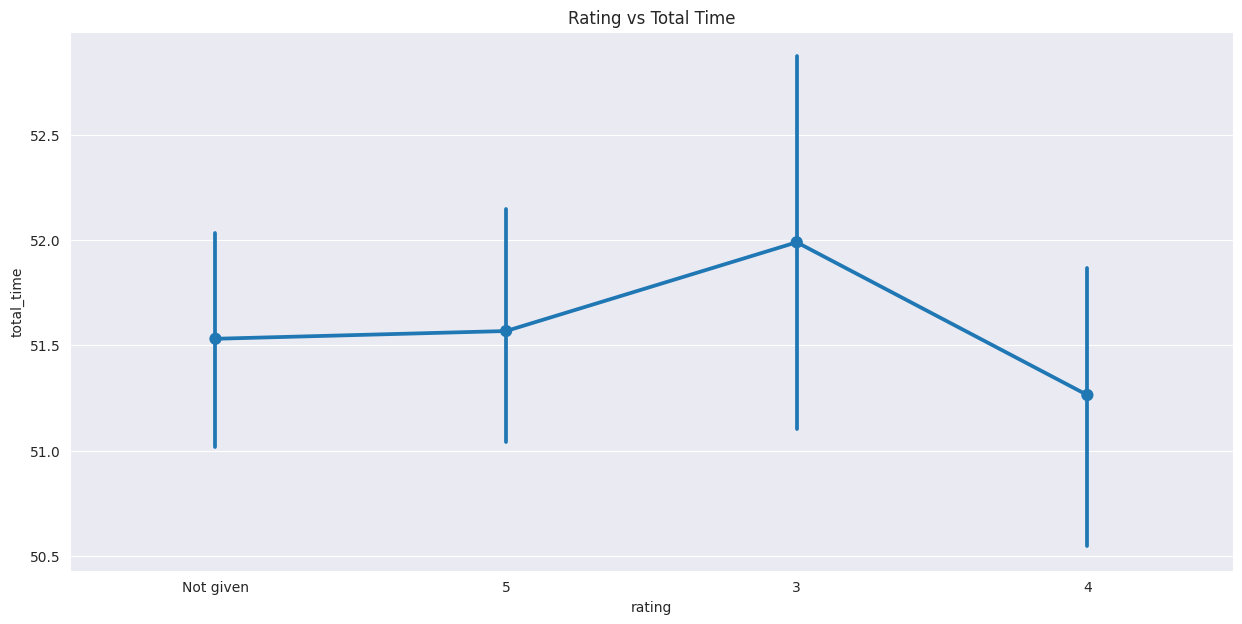

In [83]:
point_multivariate_analysis(df,"rating","total_time","Rating vs Total Time",False)

#### Observations:
- The lowest rating (3) has the higher delivery time in average.

#### Rating vs Cost of the order

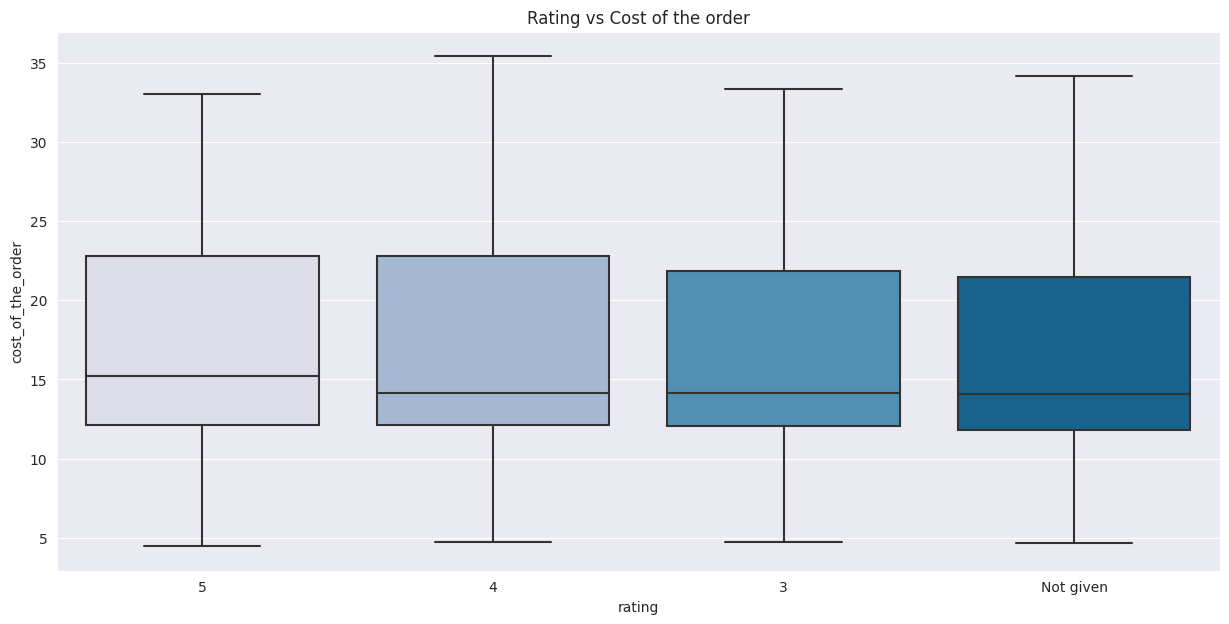

In [94]:
#point_multivariate_analysis(df,"rating","cost_of_the_order","Rating vs Cost of the order",False)
box_plot_multivariate_analysis(df,"rating","cost_of_the_order","Rating vs Cost of the order",False)


Observations:
- Apparently there is no relationship between the cost of the order and the rating.

Day of week vs Delivery Time

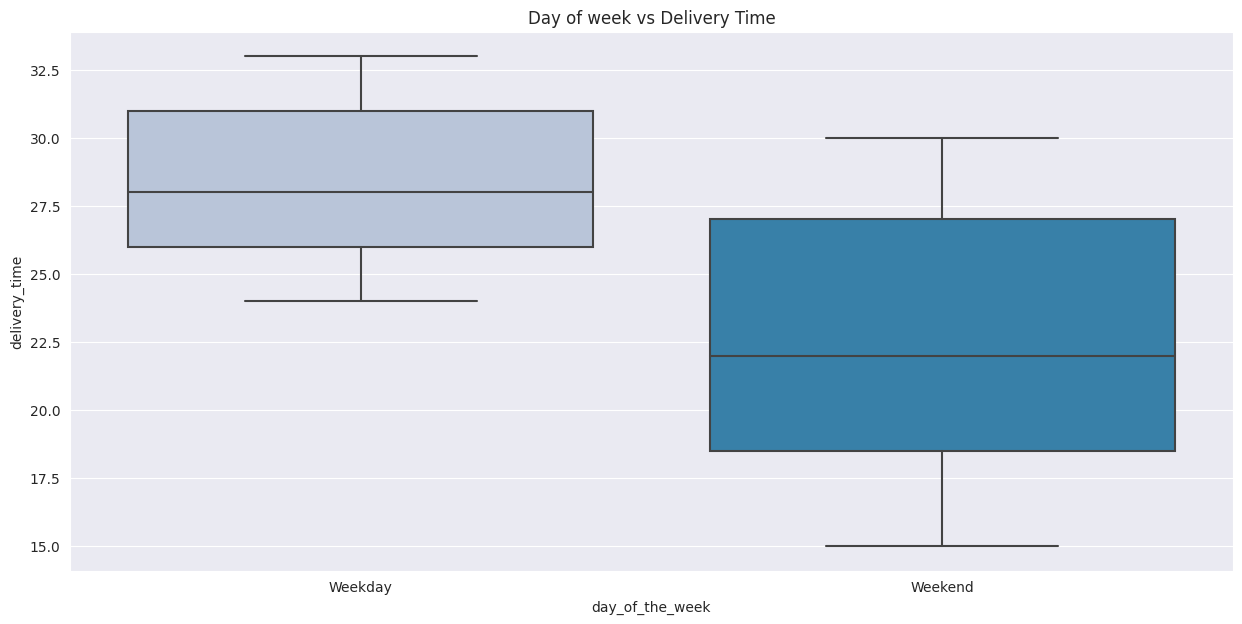

In [85]:
box_plot_multivariate_analysis(df,"day_of_the_week","delivery_time","Day of week vs Delivery Time",False)

Observations:
- Delivery time is longer on weekdays than on weekends.

Observations:

Day of week vs Total Time

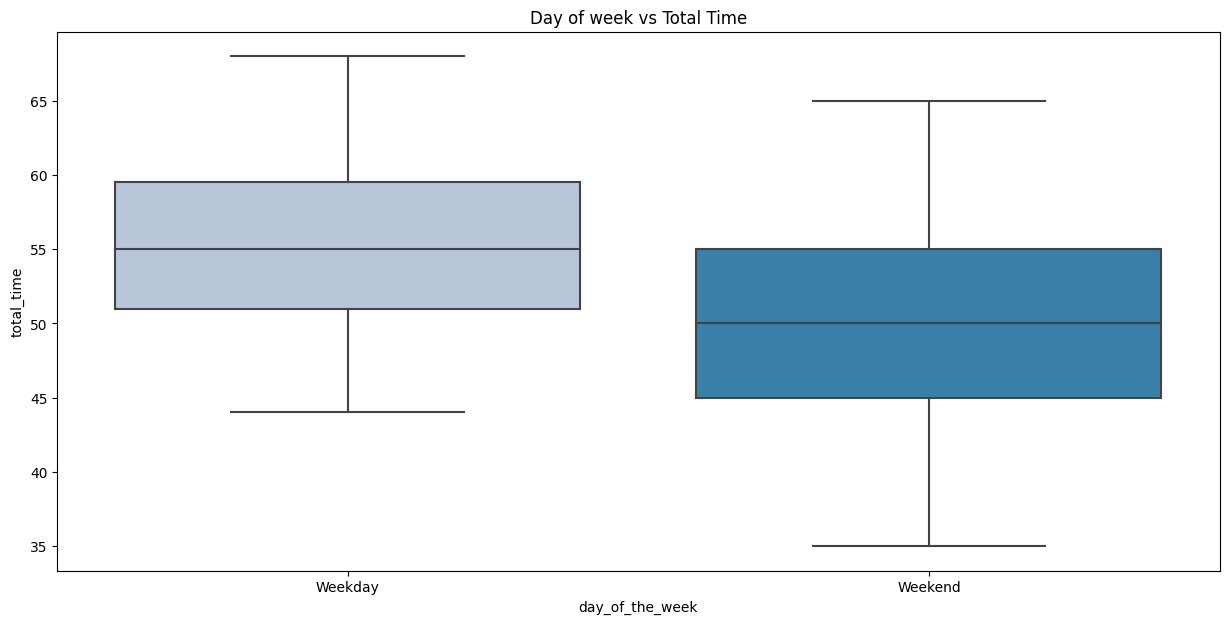

In [39]:
box_plot_multivariate_analysis(df,"day_of_the_week","total_time","Day of week vs Total Time",False)

Observations:
- Total time is longer on weekdays than on weekends.

#### Correlation among numerical variables

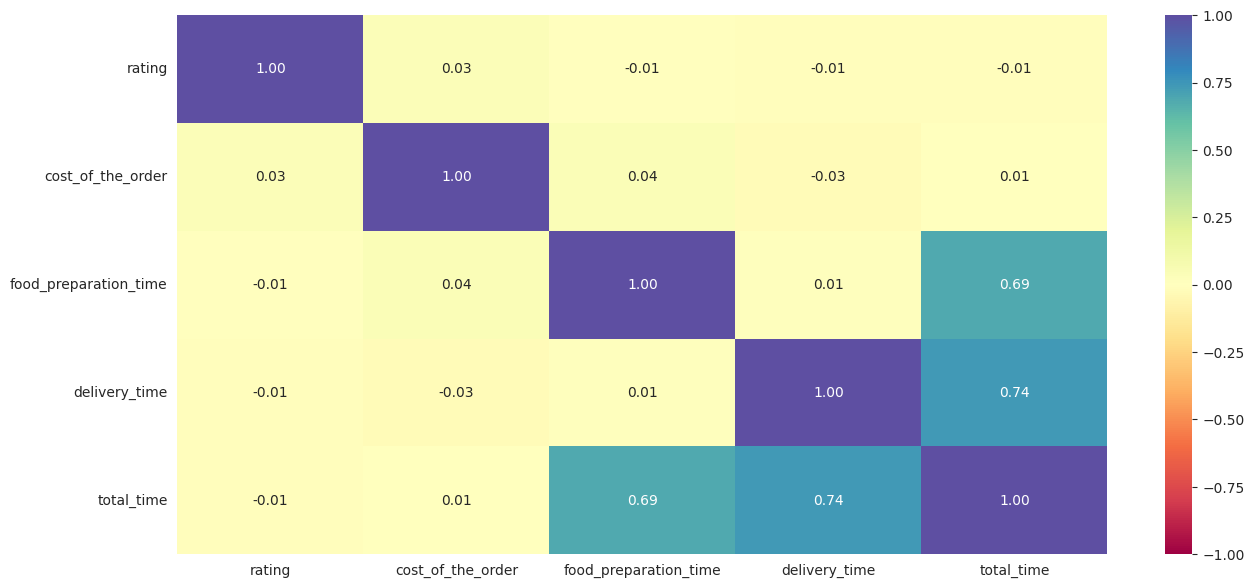

In [ ]:
#
df['rating'].replace('Not given', np.nan, inplace=True)
df["rating"] = df["rating"].astype(float)
# Plot the heatmap
col_list = ["rating",'cost_of_the_order', 'food_preparation_time', 'delivery_time',"total_time"]
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:
 - Since total time is delivery time + preparation time, there is a correlation between them.
 - There are no correlation between the order cost, the delivery time,rating or preparation time.

Pareto Analysis:

In [40]:
#Calculation the total revenue
total_income=df["cost_of_the_order"].sum()
print("Total received:",total_income)
#calculating the revenue from the 10% restaurants with more incomes.
ten_perc=round(df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(17).sum(),1)
print("Revenue from 10% more profitable:",ten_perc)
#
print("Percentage:",round(ten_perc/total_income,1)*100)
print("**"*10)
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(17)

Total received: 31314.82
Revenue from 10% more profitable: 18446.9
Percentage: 60.0
********************


restaurant_name
Shake Shack                              3579.53
The Meatball Shop                        2145.21
Blue Ribbon Sushi                        1903.95
Blue Ribbon Fried Chicken                1662.29
Parm                                     1112.76
RedFarm Broadway                          965.13
RedFarm Hudson                            921.21
TAO                                       834.50
Han Dynasty                               755.29
Blue Ribbon Sushi Bar & Grill             666.62
Rubirosa                                  660.45
Sushi of Gari 46                          640.87
Nobu Next Door                            623.67
Five Guys Burgers and Fries               506.47
Momoya                                    492.13
Chipotle Mexican Grill $1.99 Delivery     491.69
Blue Ribbon Sushi Izakaya                 485.09
Name: cost_of_the_order, dtype: float64

Observations:
 - Abput **10%** of the restaurants are accountable for **60%** of revenue.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')
# counting the number of ratings by unique restarants and calculating the mean.
df_rated=df_rated.groupby("restaurant_name").agg({"order_id":"count","rating":"mean"}).reset_index()
#filtering
df_rated_filtered=df_rated[(df_rated["order_id"]>50) & (df_rated["rating"]>4)]
#Sorting and printing
df_rated_filtered.sort_values(by=["order_id","rating"],ascending=False)


,restaurant_name,order_id,rating
117,Shake Shack,133,4.278195
132,The Meatball Shop,84,4.511905
17,Blue Ribbon Sushi,73,4.219178
16,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
- The list of restaurants with rating count of more than 50 and the average rating greater than 4:
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
df["Charge"] = df["cost_of_the_order"].apply(lambda x: x*0.25 if x>20 else x*0.15 if x>5 else 0)
df["Charge"].sum()

6166.303

#### Observations:
- The net revenue across all orders is  **6166.3** dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df["total_time_more_than_60"] = df['total time'].apply(lambda x:x>60)
df.value_counts("total_time_more_than_60",normalize=True)

total_time_more_than_60
False    0.894626
True     0.105374
dtype: float64

#### Observations:
- **10.5%** of the orders took more than 60 minutes

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df.groupby("day_of_the_week")["delivery_time"].mean()



day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
- the mean delivery time is longer in the weekdays (**28.3** minutes) than in the weekends (**22.4** minutes).

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* The dataset has **1898** records.
* There are **178** unique restaurants and **14** different types of cuisine.
* There is a high percentage of unrated orders (**38.7%**)
* Based on the dataset the company has a net renevue of USD **6166.3** dollars.
* **71.2%** of all orders were on  weekends.
* The most popular type of cuisine is the **American**.   
* About **10%** of the restaurants are accountable for **~60%** of the revenue.

### Recommendations:

* The company may create incentives for customers to rate more orders.
* The company could give discounts or other types of promotions to increase the use of the application during the weekdays.
* In the future, the company could implement a recommendation system using machine learning to recommend restaurants and types of cuisine to customers.

---